In [1]:
# Importing Pandas and NumPy
import pandas as pd
import numpy as np

In [4]:
# Importing all datasets
Telecom= pd.read_csv("Preprocessed.csv")

In [5]:
Telecom.head()

,customerID,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,SeniorCitizen,Partner,Dependents,...,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
0,7590-VHVEG,1,0,1,29.85,29.85,0,0,1,0,...,0,1,1,0,1,0,1,0,1,0
1,5575-GNVDE,34,1,0,56.95,1889.50,0,0,0,0,...,1,0,0,1,1,0,1,0,1,0
2,3668-QPYBK,2,1,1,53.85,108.15,1,0,0,0,...,0,1,1,0,1,0,1,0,1,0
3,7795-CFOCW,45,0,0,42.30,1840.75,0,0,0,0,...,1,0,0,1,0,1,1,0,1,0
4,9237-HQITU,2,1,1,70.70,151.65,1,0,0,0,...,1,0,1,0,1,0,1,0,1,0


# Feature Standardisation

In [7]:
# Normalising continuous features
df = Telecom[['tenure','MonthlyCharges','TotalCharges']]

In [8]:
normalized_df=(df-df.mean())/df.std()

In [9]:
Telecom = Telecom.drop(['tenure','MonthlyCharges','TotalCharges'], 1)

In [10]:
Telecom = pd.concat([Telecom,normalized_df],axis=1)

In [11]:
Telecom.head()

,customerID,PhoneService,PaperlessBilling,Churn,SeniorCitizen,Partner,Dependents,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),...,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes,tenure,MonthlyCharges,TotalCharges
0,7590-VHVEG,0,1,0,0,1,0,0,0,0,...,0,1,0,1,0,1,0,-1.277354,-1.160241,-0.994901
1,5575-GNVDE,1,0,0,0,0,0,1,0,0,...,1,1,0,1,0,1,0,0.066323,-0.259611,-0.173863
2,3668-QPYBK,1,1,1,0,0,0,0,0,0,...,0,1,0,1,0,1,0,-1.236636,-0.362635,-0.960331
3,7795-CFOCW,0,0,0,0,0,0,1,0,0,...,1,0,1,1,0,1,0,0.514215,-0.746482,-0.195386
4,9237-HQITU,1,1,1,0,0,0,0,0,0,...,0,1,0,1,0,1,0,-1.236636,0.197351,-0.941126


# Checking the Churn Rate

In [12]:
churn = (sum(Telecom['Churn'])/len(Telecom['Churn'].index))*100

In [13]:
churn

26.536987079369588

# Model Building

In [14]:
#Splitting Data into Training and Test Sets
from sklearn.model_selection import train_test_split

In [15]:
# Putting feature variable to X
X = Telecom.drop(['Churn','customerID'],axis=1)

# Putting response variable to y
y = Telecom['Churn']

In [16]:
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64

In [17]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=100)

# Running Your First Training Model

In [18]:
import statsmodels.api as sm

In [19]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

C:\Users\Dell\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4930
Model:                            GLM   Df Residuals:                     4906
Model Family:                Binomial   Df Model:                           23
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2008.6
Date:                Thu, 14 May 2020   Deviance:                       4017.3
Time:                        21:26:32   Pearson chi2:                 5.71e+03
No. Iterations:                     7   Covariance Type:             nonrobust
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -2.5571      1.182     -2.163      0.031      -4.874      -0.240
PhoneService                              0.4628      0.587      0.789      0.430      -0.687       1.613
PaperlessBilling                          0.3445      0.090      3.820      0.000       0.168       0.521
SeniorCitizen                             0.2943      0.103      2.870      0.004       0.093       0.495
Partner                                   0.0259      0.094      0.275      0.783      -0.158       0.210
Dependents                               -0.2234      0.108     -2.075      0.038      -0.434      -0.012
Contract_One year                        -0.6766      0.129     -5.232      0.000      -0.930      -0.423
Contract_Two year                        -1.3507      0.207     -6.518      0.000      -1.757      -0.945
PaymentMethod_Credit card (automatic)    -0.1523      0.138     -1.102      0.270      -0.423       0.119
PaymentMethod_Electronic check            0.2744      0.114      2.405      0.016       0.051       0.498
PaymentMethod_Mailed check               -0.0881      0.139     -0.636      0.525      -0.360       0.184
gender_Male                              -0.0411      0.078     -0.524      0.600      -0.195       0.113
MultipleLines_No                         -0.0461      0.204     -0.227      0.821      -0.445       0.353
MultipleLines_Yes                         0.5089      0.392      1.298      0.194      -0.260       1.277
InternetService_Fiber optic               2.0272      0.967      2.096      0.036       0.132       3.922
InternetService_No                       -2.6205      1.319     -1.986      0.047      -5.207      -0.034
OnlineSecurity_No                         0.0527      0.058      0.906      0.365      -0.061       0.167
OnlineSecurity_Yes                        0.0107      0.174      0.061      0.951      -0.330       0.352
OnlineBackup_No                           0.0410      0.054      0.758      0.449      -0.065       0.147
OnlineBackup_Yes                          0.0223      0.172      0.130      0.897      -0.315       0.360
DeviceProtection_No                      -0.0699      0.056     -1.256      0.209      -0.179       0.039
DeviceProtection_Yes                      0.1332      0.173      0.771      0.441      -0.206       0.472
TechSupport_No                            0.1575      0.059      2.655      0.008       0.041       0.274
TechSupport_Yes                          -0.0942      0.175     -0.538      0.591      -0.437       0.249
StreamingTV_No                           -0.3196      0.133     -2.405      0.016      -0.580      -0.059
StreamingTV_Yes                           0.3830      0.267      1.434      0.152      -0.140       0.906
StreamingMovies_No                       -0.3047      0.133     -2.296      0.022      -

# Correlation Matrix

In [20]:
# Importing matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

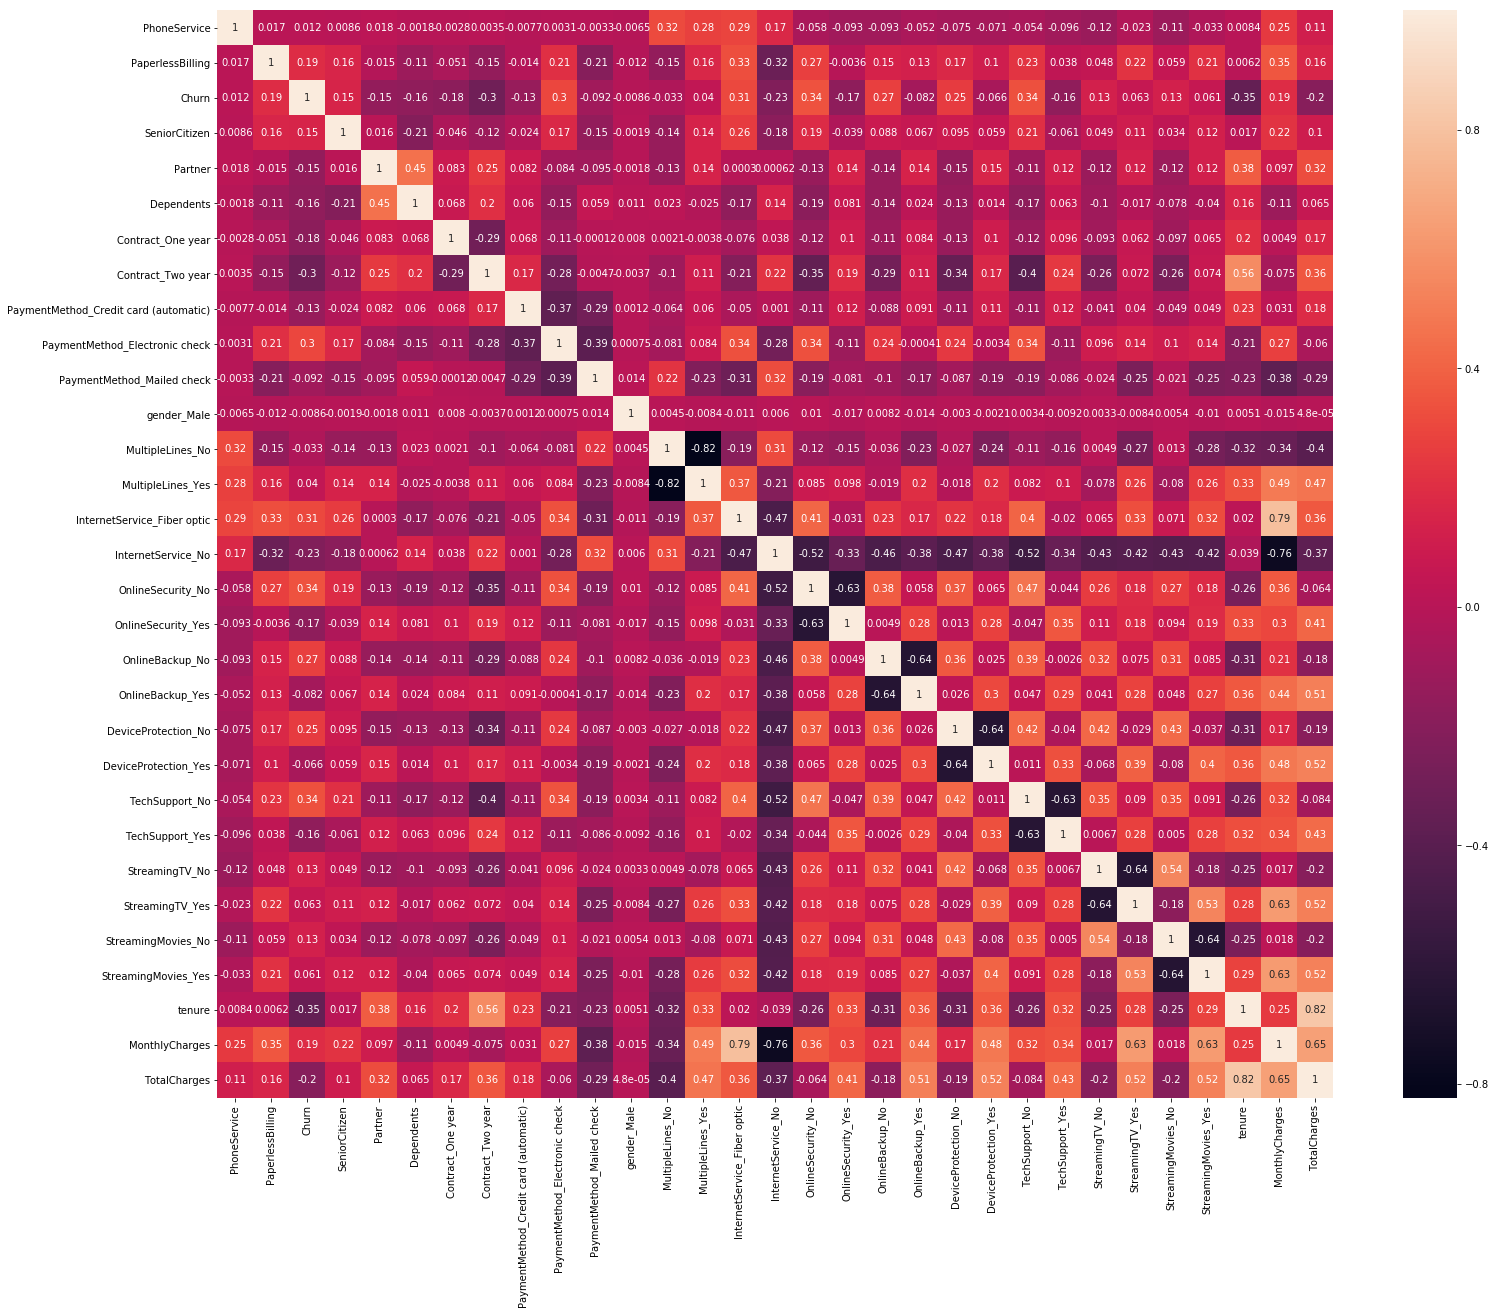

In [25]:
# Let's see the correlation matrix 
plt.figure(figsize = (25,20))        # Size of the figure
sns.heatmap(Telecom.corr(),annot = True)

# Dropping highly correlated variables.

In [26]:
X_test2 = X_test.drop(['MultipleLines_No','OnlineSecurity_No','OnlineBackup_No','DeviceProtection_No','TechSupport_No','StreamingTV_No','StreamingMovies_No'],1)
X_train2 = X_train.drop(['MultipleLines_No','OnlineSecurity_No','OnlineBackup_No','DeviceProtection_No','TechSupport_No','StreamingTV_No','StreamingMovies_No'],1)

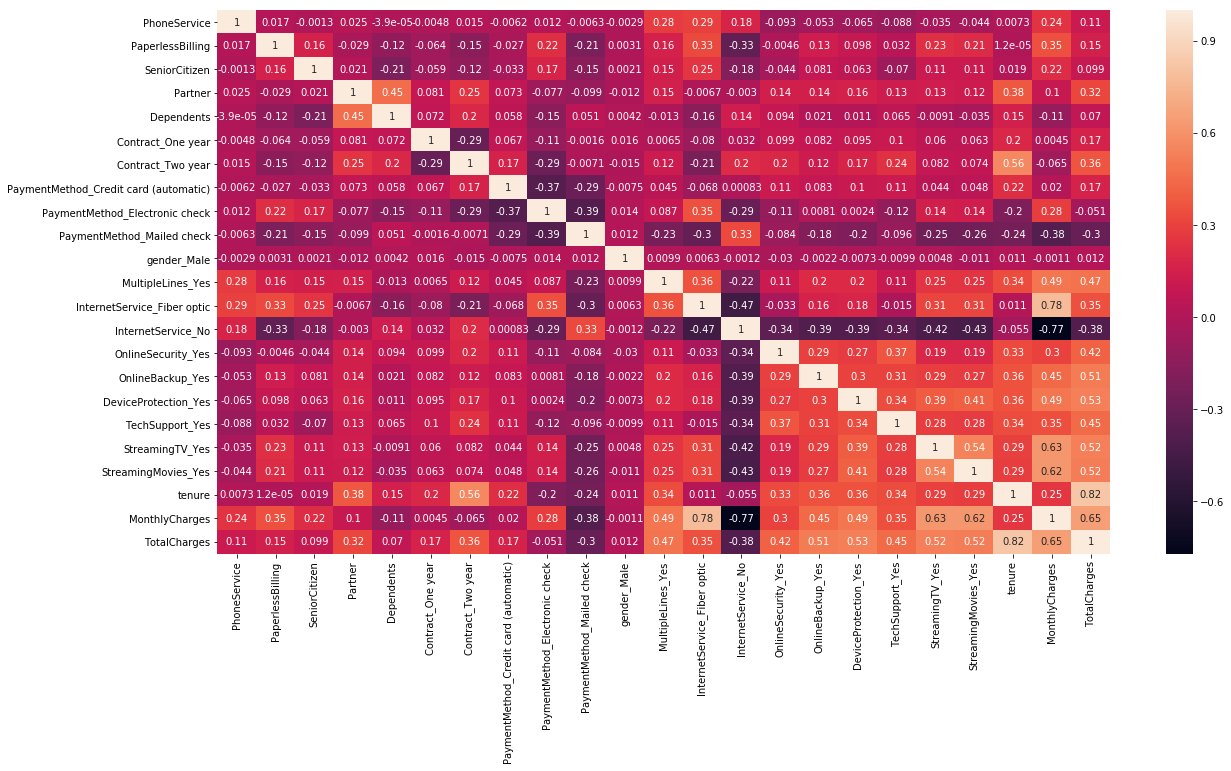

In [27]:
plt.figure(figsize = (20,10))
sns.heatmap(X_train2.corr(),annot = True)

In [28]:
logm2 = sm.GLM(y_train,(sm.add_constant(X_train2)), family = sm.families.Binomial())
logm2.fit().summary()

C:\Users\Dell\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4930
Model:                            GLM   Df Residuals:                     4906
Model Family:                Binomial   Df Model:                           23
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2008.6
Date:                Thu, 14 May 2020   Deviance:                       4017.3
Time:                        21:34:33   Pearson chi2:                 5.71e+03
No. Iterations:                     7   Covariance Type:             nonrobust
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -3.0001      1.540     -1.949      0.051      -6.018       0.018
PhoneService                              0.4167      0.786      0.530      0.596      -1.124       1.957
PaperlessBilling                          0.3445      0.090      3.820      0.000       0.168       0.521
SeniorCitizen                             0.2943      0.103      2.870      0.004       0.093       0.495
Partner                                   0.0259      0.094      0.275      0.783      -0.158       0.210
Dependents                               -0.2234      0.108     -2.075      0.038      -0.434      -0.012
Contract_One year                        -0.6766      0.129     -5.232      0.000      -0.930      -0.423
Contract_Two year                        -1.3507      0.207     -6.518      0.000      -1.757      -0.945
PaymentMethod_Credit card (automatic)    -0.1523      0.138     -1.102      0.270      -0.423       0.119
PaymentMethod_Electronic check            0.2744      0.114      2.405      0.016       0.051       0.498
PaymentMethod_Mailed check               -0.0881      0.139     -0.636      0.525      -0.360       0.184
gender_Male                              -0.0411      0.078     -0.524      0.600      -0.195       0.113
MultipleLines_Yes                         0.5551      0.215      2.583      0.010       0.134       0.976
InternetService_Fiber optic               2.0272      0.967      2.096      0.036       0.132       3.922
InternetService_No                       -2.1775      0.977     -2.228      0.026      -4.093      -0.262
OnlineSecurity_Yes                       -0.0420      0.217     -0.194      0.846      -0.466       0.382
OnlineBackup_Yes                         -0.0187      0.211     -0.089      0.929      -0.433       0.396
DeviceProtection_Yes                      0.2031      0.213      0.952      0.341      -0.215       0.621
TechSupport_Yes                          -0.2517      0.219     -1.149      0.250      -0.681       0.177
StreamingTV_Yes                           0.7026      0.397      1.770      0.077      -0.075       1.480
StreamingMovies_Yes                       0.6728      0.396      1.698      0.089      -0.104       1.449
tenure                                   -1.2987      0.173     -7.488      0.000      -1.639      -0.959
MonthlyCharges                           -1.5224      1.158     -1.314      0.189      -3.793       0.748
TotalCharges                              0.5634      0.185      3.042      0.002       0.200       0.926
=========================================================================================================
"""

# Feature Selection Using RFE

In [29]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 13)             # running RFE with 13 variables as output
rfe = rfe.fit(X,y)
print(rfe.support_)           # Printing the boolean results
print(rfe.ranking_)         

C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this w

[ True  True False False False  True  True False  True False False  True
 False  True  True False  True False False False False False  True False
 False  True False  True False  True]
[ 1  1  2 17  6  1  1 11  1 12 14  1  8  1  1  4  1 15  5 13 10  7  1  3
 16  1 18  1  9  1]


C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [31]:
Telecom.columns

Index(['customerID', 'PhoneService', 'PaperlessBilling', 'Churn',
       'SeniorCitizen', 'Partner', 'Dependents', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'gender_Male', 'MultipleLines_No', 'MultipleLines_Yes',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No', 'OnlineSecurity_Yes', 'OnlineBackup_No',
       'OnlineBackup_Yes', 'DeviceProtection_No', 'DeviceProtection_Yes',
       'TechSupport_No', 'TechSupport_Yes', 'StreamingTV_No',
       'StreamingTV_Yes', 'StreamingMovies_No', 'StreamingMovies_Yes',
       'tenure', 'MonthlyCharges', 'TotalCharges'],
      dtype='object')

In [32]:
# Variables selected by RFE 
col = ['PhoneService', 'PaperlessBilling', 'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Electronic check','MultipleLines_No','InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_Yes','TechSupport_Yes','StreamingMovies_No','tenure','TotalCharges']

In [33]:
# Let's run the model using the selected variables
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logsk = LogisticRegression()
logsk.fit(X_train[col], y_train)

C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [34]:
#Comparing the model with StatsModels
logm4 = sm.GLM(y_train,(sm.add_constant(X_train[col])), family = sm.families.Binomial())
logm4.fit().summary()

C:\Users\Dell\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4930
Model:                            GLM   Df Residuals:                     4916
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2024.1
Date:                Thu, 14 May 2020   Deviance:                       4048.3
Time:                        22:10:11   Pearson chi2:                 5.79e+03
No. Iterations:                     7   Covariance Type:             nonrobust
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                             -0.9166      0.164     -5.592      0.000      -1.238      -0.595
PhoneService                      -0.3034      0.169     -1.791      0.073      -0.635       0.029
PaperlessBilling                   0.3708      0.089      4.154      0.000       0.196       0.546
Contract_One year                 -0.7265      0.127     -5.702      0.000      -0.976      -0.477
Contract_Two year                 -1.4150      0.205     -6.892      0.000      -1.817      -1.013
PaymentMethod_Electronic check     0.3792      0.083      4.572      0.000       0.217       0.542
MultipleLines_No                  -0.3261      0.095     -3.421      0.001      -0.513      -0.139
InternetService_Fiber optic        0.8356      0.117      7.117      0.000       0.605       1.066
InternetService_No                -1.1307      0.179     -6.322      0.000      -1.481      -0.780
OnlineSecurity_Yes                -0.3211      0.101     -3.168      0.002      -0.520      -0.122
TechSupport_Yes                   -0.5294      0.103     -5.132      0.000      -0.732      -0.327
StreamingMovies_No                -0.2382      0.094     -2.547      0.011      -0.421      -0.055
tenure                            -1.2938      0.167     -7.731      0.000      -1.622      -0.966
TotalCharges                       0.5382      0.175      3.079      0.002       0.196       0.881
==================================================================================================
"""

In [35]:
# UDF for calculating vif value
def vif_cal(input_data, dependent_col):
    vif_df = pd.DataFrame( columns = ['Var', 'Vif'])
    x_vars=input_data.drop([dependent_col], axis=1)
    xvar_names=x_vars.columns
    for i in range(0,xvar_names.shape[0]):
        y=x_vars[xvar_names[i]] 
        x=x_vars[xvar_names.drop(xvar_names[i])]
        rsq=sm.OLS(y,x).fit().rsquared  
        vif=round(1/(1-rsq),2)
        vif_df.loc[i] = [xvar_names[i], vif]
    return vif_df.sort_values(by = 'Vif', axis=0, ascending=False, inplace=False)

In [38]:
Telecom.columns
['PhoneService', 'PaperlessBilling', 'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Electronic check','MultipleLines_No','InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_Yes','TechSupport_Yes','StreamingMovies_No','tenure','TotalCharges']

['PhoneService',
 'PaperlessBilling',
 'Contract_One year',
 'Contract_Two year',
 'PaymentMethod_Electronic check',
 'MultipleLines_No',
 'InternetService_Fiber optic',
 'InternetService_No',
 'OnlineSecurity_Yes',
 'TechSupport_Yes',
 'StreamingMovies_No',
 'tenure',
 'TotalCharges']

In [40]:
# Calculating Vif value
vif_cal(input_data=Telecom.drop(['customerID','SeniorCitizen', 'Partner', 'Dependents',
                                 'PaymentMethod_Credit card (automatic)','PaymentMethod_Mailed check',
                                 'gender_Male','MultipleLines_Yes','OnlineSecurity_No','OnlineBackup_No',
                                 'OnlineBackup_Yes', 'DeviceProtection_No', 'DeviceProtection_Yes',
                                 'TechSupport_No','StreamingTV_No','StreamingTV_Yes','StreamingMovies_Yes',
                                 'MonthlyCharges'], axis=1), dependent_col='Churn')

,Var,Vif
0,PhoneService,10.83
12,TotalCharges,8.36
11,tenure,6.55
7,InternetService_No,4.09
6,InternetService_Fiber optic,4.00
3,Contract_Two year,3.11
5,MultipleLines_No,2.85
1,PaperlessBilling,2.61
10,StreamingMovies_No,2.44
9,TechSupport_Yes,2.01


# Dropping Variable with high VIF

In [41]:
col = ['PaperlessBilling', 'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Electronic check','MultipleLines_No','InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_Yes','TechSupport_Yes','StreamingMovies_No','tenure','TotalCharges']

In [42]:
logm5 = sm.GLM(y_train,(sm.add_constant(X_train[col])), family = sm.families.Binomial())
logm5.fit().summary()

C:\Users\Dell\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4930
Model:                            GLM   Df Residuals:                     4917
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2025.8
Date:                Thu, 14 May 2020   Deviance:                       4051.5
Time:                        22:14:56   Pearson chi2:                 5.65e+03
No. Iterations:                     7   Covariance Type:             nonrobust
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                             -1.0806      0.137     -7.895      0.000      -1.349      -0.812
PaperlessBilling                   0.3670      0.089      4.118      0.000       0.192       0.542
Contract_One year                 -0.7272      0.127     -5.710      0.000      -0.977      -0.478
Contract_Two year                 -1.4086      0.205     -6.871      0.000      -1.810      -1.007
PaymentMethod_Electronic check     0.3817      0.083      4.603      0.000       0.219       0.544
MultipleLines_No                  -0.3953      0.087     -4.542      0.000      -0.566      -0.225
InternetService_Fiber optic        0.7579      0.108      6.992      0.000       0.545       0.970
InternetService_No                -1.2253      0.170     -7.190      0.000      -1.559      -0.891
OnlineSecurity_Yes                -0.3244      0.101     -3.202      0.001      -0.523      -0.126
TechSupport_Yes                   -0.5296      0.103     -5.134      0.000      -0.732      -0.327
StreamingMovies_No                -0.2564      0.093     -2.756      0.006      -0.439      -0.074
tenure                            -1.2345      0.164     -7.521      0.000      -1.556      -0.913
TotalCharges                       0.4605      0.170      2.716      0.007       0.128       0.793
==================================================================================================
"""

In [44]:
# Calculating Vif value
vif_cal(input_data=Telecom.drop(['customerID','PhoneService','SeniorCitizen', 'Partner', 'Dependents',
                                 'PaymentMethod_Credit card (automatic)','PaymentMethod_Mailed check',
                                 'gender_Male','MultipleLines_Yes','OnlineSecurity_No','OnlineBackup_No',
                                 'OnlineBackup_Yes', 'DeviceProtection_No', 'DeviceProtection_Yes',
                                 'TechSupport_No','StreamingTV_No','StreamingTV_Yes','StreamingMovies_Yes',
                                 'MonthlyCharges'], axis=1), dependent_col='Churn')

,Var,Vif
11,TotalCharges,8.05
10,tenure,6.33
5,InternetService_Fiber optic,3.10
2,Contract_Two year,2.97
6,InternetService_No,2.87
0,PaperlessBilling,2.44
4,MultipleLines_No,2.34
9,StreamingMovies_No,2.15
8,TechSupport_Yes,1.97
7,OnlineSecurity_Yes,1.88


In [45]:
# Let's run the model using the selected variables
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logsk = LogisticRegression()
logsk.fit(X_train[col], y_train)

C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

# Making Predictions

In [46]:
# Predicted probabilities
y_pred = logsk.predict_proba(X_test[col])

In [47]:
# Converting y_pred to a dataframe which is an array
y_pred_df = pd.DataFrame(y_pred)

In [48]:
# Converting to column dataframe
y_pred_1 = y_pred_df.iloc[:,[1]]

In [49]:
# Let's see the head
y_pred_1.head()

,1
0,0.005832
1,0.002142
2,0.017029
3,0.007814
4,0.135880


In [50]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [51]:
# Putting CustID to index
y_test_df['CustID'] = y_test_df.index

In [52]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [53]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df,y_pred_1],axis=1)

In [54]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 1 : 'Churn_Prob'})

In [55]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex_axis(['CustID','Churn','Churn_Prob'], axis=1)

C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  


In [56]:
# Let's see the head of y_pred_final
y_pred_final.head()

,CustID,Churn,Churn_Prob
0,4880,0,0.005832
1,1541,0,0.002142
2,1289,0,0.017029
3,5745,0,0.007814
4,4873,0,0.135880


In [57]:
# Creating new column 'predicted' with 1 if Churn_Prob>0.5 else 0
y_pred_final['predicted'] = y_pred_final.Churn_Prob.map( lambda x: 1 if x > 0.5 else 0)

In [58]:
# Let's see the head
y_pred_final.head()

,CustID,Churn,Churn_Prob,predicted
0,4880,0,0.005832,0
1,1541,0,0.002142,0
2,1289,0,0.017029,0
3,5745,0,0.007814,0
4,4873,0,0.135880,0


# Model Evaluation

In [59]:
from sklearn import metrics

In [60]:
help(metrics.confusion_matrix)

Help on function confusion_matrix in module sklearn.metrics.classification:

confusion_matrix(y_true, y_pred, labels=None, sample_weight=None)
    Compute confusion matrix to evaluate the accuracy of a classification
    
    By definition a confusion matrix :math:`C` is such that :math:`C_{i, j}`
    is equal to the number of observations known to be in group :math:`i` but
    predicted to be in group :math:`j`.
    
    Thus in binary classification, the count of true negatives is
    :math:`C_{0,0}`, false negatives is :math:`C_{1,0}`, true positives is
    :math:`C_{1,1}` and false positives is :math:`C_{0,1}`.
    
    Read more in the :ref:`User Guide <confusion_matrix>`.
    
    Parameters
    ----------
    y_true : array, shape = [n_samples]
        Ground truth (correct) target values.
    
    y_pred : array, shape = [n_samples]
        Estimated targets as returned by a classifier.
    
    labels : array, shape = [n_classes], optional
        List of labels to index the m

In [61]:
# Confusion matrix 
confusion = metrics.confusion_matrix( y_pred_final.Churn, y_pred_final.predicted )
confusion

array([[1370,  177],
       [ 258,  308]], dtype=int64)

In [62]:
#Let's check the overall accuracy.
metrics.accuracy_score( y_pred_final.Churn, y_pred_final.predicted)

0.7941315664931378

In [63]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [64]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.5441696113074205

In [65]:
# Let us calculate specificity
TN / float(TN+FP)

0.885585003232062

In [66]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.11441499676793794


In [67]:
# positive predictive value 
print (TP / float(TP+FP))

0.6350515463917525


In [68]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8415233415233415


# ROC Curve
An ROC curve demonstrates several things:

It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [69]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(6, 4))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return fpr, tpr, thresholds

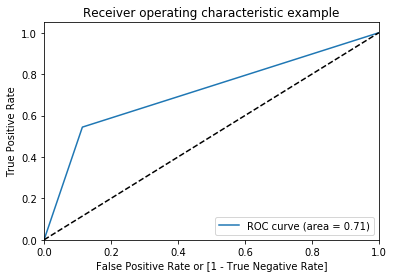

(array([0.      , 0.114415, 1.      ]),
 array([0.        , 0.54416961, 1.        ]),
 array([2, 1, 0], dtype=int64))

In [70]:
draw_roc(y_pred_final.Churn, y_pred_final.predicted)

# Finding Optimal Cutoff Point
Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [72]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_pred_final[i]= y_pred_final.Churn_Prob.map( lambda x: 1 if x > i else 0)
y_pred_final.head()

,CustID,Churn,Churn_Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,4880,0,0.005832,0,1,0,0,0,0,0,0,0,0,0
1,1541,0,0.002142,0,1,0,0,0,0,0,0,0,0,0
2,1289,0,0.017029,0,1,0,0,0,0,0,0,0,0,0
3,5745,0,0.007814,0,1,0,0,0,0,0,0,0,0,0
4,4873,0,0.135880,0,1,1,0,0,0,0,0,0,0,0


In [73]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix( y_pred_final.Churn, y_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.267866  1.000000  0.000000
0.1   0.1  0.604827  0.943463  0.480931
0.2   0.2  0.688121  0.860424  0.625081
0.3   0.3  0.738287  0.759717  0.730446
0.4   0.4  0.772835  0.666078  0.811894
0.5   0.5  0.794132  0.544170  0.885585
0.6   0.6  0.790345  0.388693  0.937298
0.7   0.7  0.767629  0.199647  0.975436
0.8   0.8  0.738287  0.022968  1.000000
0.9   0.9  0.732134  0.000000  1.000000


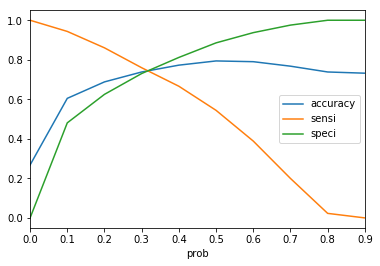

In [74]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])

# From the curve above, 0.3 is the optimum point to take it as a cutoff probability.

In [75]:
y_pred_final['final_predicted'] = y_pred_final.Churn_Prob.map( lambda x: 1 if x > 0.3 else 0)

In [76]:
y_pred_final.head()

,CustID,Churn,Churn_Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,4880,0,0.005832,0,1,0,0,0,0,0,0,0,0,0,0
1,1541,0,0.002142,0,1,0,0,0,0,0,0,0,0,0,0
2,1289,0,0.017029,0,1,0,0,0,0,0,0,0,0,0,0
3,5745,0,0.007814,0,1,0,0,0,0,0,0,0,0,0,0
4,4873,0,0.135880,0,1,1,0,0,0,0,0,0,0,0,0


In [77]:
#Let's check the overall accuracy.
metrics.accuracy_score( y_pred_final.Churn, y_pred_final.final_predicted)

0.7382867960246096

In [78]:
metrics.confusion_matrix( y_pred_final.Churn, y_pred_final.final_predicted )

array([[1130,  417],
       [ 136,  430]], dtype=int64)